# 1. Librerias necesarias

In [22]:
# Librerías principales para el modelo y visualización
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


# 2. Carga de Datasets

In [ ]:
# Dataset de entrenamiento (imágenes de evaluación)
train_data = pd.read_csv('bengali_numeros_ent.csv')
# Dataset de prueba (imágenes de evaluación)
test_data = pd.read_csv('bengali_numeros_pru.csv')

# 3. Funcion para preprocesar datos

In [23]:
# Convierte datos en tensores normalizados
def preprocess_data(df):
    images = df.drop('label', axis=1).values / 255.0  # Normaliza y adapta las imágenes
    images = torch.tensor(images, dtype=torch.float32).view(-1, 1, 28, 28)
    labels = torch.tensor(df['label'].values, dtype=torch.long)
    return images, labels

# 4. Preparacion de datos

In [24]:
# Convierte los datasets en tensores listos para usar
train_images, train_labels = preprocess_data(train_data)
test_images, test_labels = preprocess_data(test_data)

# 5. Carga de datos en mini-batches

In [25]:
# Define los DataLoaders para entrenamiento y prueba
train_loader = DataLoader(TensorDataset(train_images, train_labels), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_images, test_labels), batch_size=64, shuffle=False)

# 6. Visualización inicial del dataset de entrenamiento

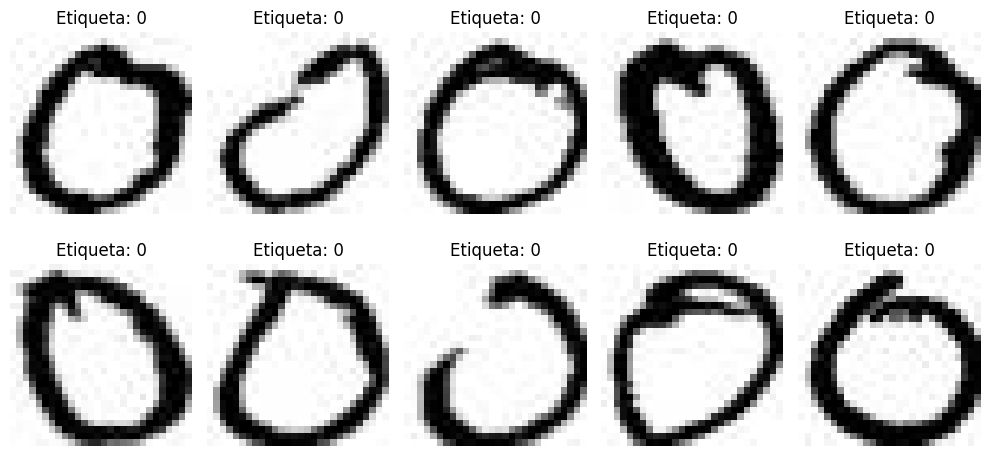

In [ ]:
# Muestra las 10 imágenes señaladas con sus etiquetas
def visualize_sample_images(train_data, inicio=0):
    muestra = train_data.iloc[inicio:inicio+10]
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    
    for i in range(10):
        image = muestra.iloc[i, 1:].values.reshape(28, 28)
        label = muestra.iloc[i, 0]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Etiqueta: {label}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_sample_images(train_data, inicio=0)


# 7. Definición de la red neuronal

In [31]:
# Arquitectura con 3 capas ocultas y salida para 10 clases
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)   # Capa oculta 1
        self.fc2 = nn.Linear(512, 256)       # Capa oculta 2
        self.fc3 = nn.Linear(256, 128)       # Capa oculta 3
        self.output = nn.Linear(128, 10)     # Capa de salida (10 clases)

    def forward(self, x):
        x = x.view(-1, 28 * 28)              # Aplanamiento de la imagen
        x = torch.relu(self.fc1(x))          # ReLU 1
        x = torch.relu(self.fc2(x))          # ReLU 2
        x = torch.relu(self.fc3(x))          # ReLU 3
        x = self.output(x)
        return torch.log_softmax(x, dim=1)   # Log-Softmax para clasificación

# 8. Configuración inicial del modelo (Opcion 1)

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Configura GPU si está disponible

model = NeuralNetwork().to(device)  # Inicializa el modelo

criterion = nn.NLLLoss()  # Negative Log Likelihood Loss (para log_softmax)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

# 8.1 Entrenamiento del modelo (Opcion 1)

In [33]:
# Entrenamiento por 30 épocas con optimizador Adam
epochs = 30
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Reiniciar gradientes
        optimizer.zero_grad()

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        loss.backward()
        optimizer.step()

        # Acumular pérdida
        total_loss += loss.item()

        # Calcular precisión
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Guardar métricas de la época
    epoch_loss = total_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")



Epoch 1/30, Loss: 0.8986, Accuracy: 71.93%
Epoch 2/30, Loss: 0.5218, Accuracy: 83.59%
Epoch 3/30, Loss: 0.4231, Accuracy: 85.91%
Epoch 4/30, Loss: 0.3905, Accuracy: 86.92%
Epoch 5/30, Loss: 0.3612, Accuracy: 87.85%
Epoch 6/30, Loss: 0.3552, Accuracy: 87.91%
Epoch 7/30, Loss: 0.3064, Accuracy: 89.35%
Epoch 8/30, Loss: 0.2957, Accuracy: 89.72%
Epoch 9/30, Loss: 0.2808, Accuracy: 90.33%
Epoch 10/30, Loss: 0.2738, Accuracy: 90.74%
Epoch 11/30, Loss: 0.2536, Accuracy: 91.12%
Epoch 12/30, Loss: 0.2319, Accuracy: 92.05%
Epoch 13/30, Loss: 0.2461, Accuracy: 91.42%
Epoch 14/30, Loss: 0.2324, Accuracy: 91.97%
Epoch 15/30, Loss: 0.2152, Accuracy: 92.56%
Epoch 16/30, Loss: 0.1992, Accuracy: 92.99%
Epoch 17/30, Loss: 0.1964, Accuracy: 93.20%
Epoch 18/30, Loss: 0.1759, Accuracy: 93.96%
Epoch 19/30, Loss: 0.1710, Accuracy: 94.24%
Epoch 20/30, Loss: 0.1801, Accuracy: 93.80%
Epoch 21/30, Loss: 0.1702, Accuracy: 94.20%
Epoch 22/30, Loss: 0.1680, Accuracy: 94.37%
Epoch 23/30, Loss: 0.1549, Accuracy: 94.7

# 8.2 Visualizacion de precision y perdida (Opcion 1)

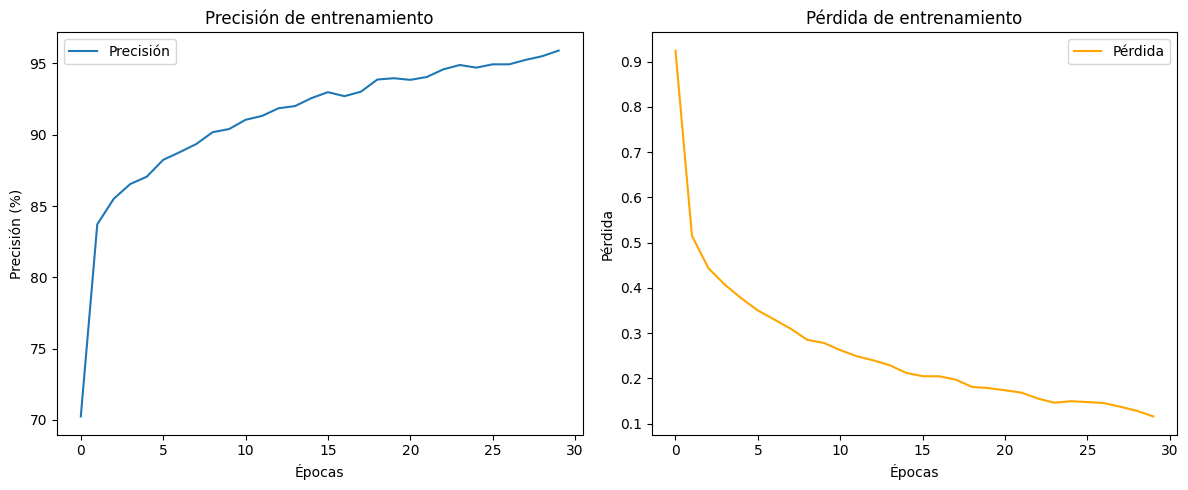

In [ ]:
# Muestra cómo cambia la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.title('Precisión de entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Pérdida', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# 8.3 Evaluación del modelo (Opcion 1)

In [ ]:
# Calcula la precisión y pérdida en el conjunto de prueba
model.eval()  # Modo evaluación
test_loss = 0
correct = 0
total = 0

with torch.no_grad():  # No se calculan gradientes
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Métricas finales
avg_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

print(f"\nEvaluación final:")
print(f"Precisión sobre datos de prueba: {accuracy:.2f}%")
print(f"Pérdida promedio: {avg_loss:.4f}")


Evaluación final:
Precisión sobre datos de prueba: 91.24%
Pérdida promedio: 0.3390


# 9. Carga de datos con otra configuración (Opción 2)

In [ ]:
# Cambiando batch_size a 128 para entrenamiento más rápido
train_loader = DataLoader(TensorDataset(train_images, train_labels), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(test_images, test_labels), batch_size=128, shuffle=False)

# 9.1 Configuracion del modelo (Opcion 2)

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Configura GPU si está disponible

model = NeuralNetwork().to(device)  # Inicializa el modelo

criterion = nn.NLLLoss()  # Negative Log Likelihood Loss (para log_softmax)
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Optimizador Adam con tasa de aprendizaje reducida


# 9.2 Entrenamiento del modelo (Opcion 2)

In [36]:
# Entrenamiento por 45 épocas con optimizador Adam y lr=0.0005
epochs = 45
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Reiniciar gradientes
        optimizer.zero_grad()

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        loss.backward()
        optimizer.step()

        # Acumular pérdida
        total_loss += loss.item()

        # Calcular precisión
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Guardar métricas de la época
    epoch_loss = total_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch 1/45, Loss: 0.9632, Accuracy: 71.25%
Epoch 2/45, Loss: 0.5665, Accuracy: 82.66%
Epoch 3/45, Loss: 0.4762, Accuracy: 84.98%
Epoch 4/45, Loss: 0.4320, Accuracy: 86.20%
Epoch 5/45, Loss: 0.3970, Accuracy: 86.74%
Epoch 6/45, Loss: 0.3673, Accuracy: 87.83%
Epoch 7/45, Loss: 0.3430, Accuracy: 88.33%
Epoch 8/45, Loss: 0.3126, Accuracy: 89.44%
Epoch 9/45, Loss: 0.2958, Accuracy: 89.83%
Epoch 10/45, Loss: 0.2831, Accuracy: 90.38%
Epoch 11/45, Loss: 0.2740, Accuracy: 90.89%
Epoch 12/45, Loss: 0.2558, Accuracy: 91.31%
Epoch 13/45, Loss: 0.2402, Accuracy: 92.13%
Epoch 14/45, Loss: 0.2420, Accuracy: 91.65%
Epoch 15/45, Loss: 0.2220, Accuracy: 92.48%
Epoch 16/45, Loss: 0.2084, Accuracy: 92.82%
Epoch 17/45, Loss: 0.2002, Accuracy: 93.10%
Epoch 18/45, Loss: 0.1991, Accuracy: 93.32%
Epoch 19/45, Loss: 0.1766, Accuracy: 94.02%
Epoch 20/45, Loss: 0.1735, Accuracy: 94.00%
Epoch 21/45, Loss: 0.1704, Accuracy: 94.12%
Epoch 22/45, Loss: 0.1519, Accuracy: 94.80%
Epoch 23/45, Loss: 0.1621, Accuracy: 94.2

# 9.3 Visualización de precisión y pérdida (Opción 2)

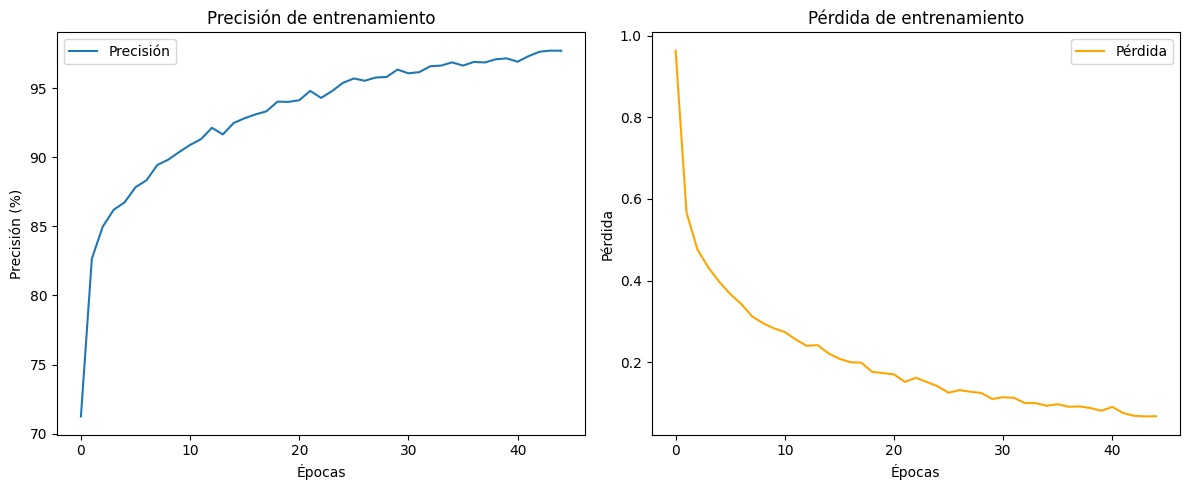

In [37]:
# Muestra cómo cambia la precisión y la pérdida durante el entrenamiento con la configuración de la Opción 2
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión (%)')
plt.title('Precisión de entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Pérdida', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# 9.4 Evaluación del modelo (Opcion 2)

In [38]:
# Calcula la precisión y pérdida en el conjunto de prueba con la configuración de la Opción 2
model.eval()  # Modo evaluación
test_loss = 0
correct = 0
total = 0

with torch.no_grad():  # No se calculan gradientes
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Métricas finales
avg_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

print(f"\nEvaluación final:")
print(f"Precisión sobre datos de prueba: {accuracy:.2f}%")
print(f"Pérdida promedio: {avg_loss:.4f}")


Evaluación final:
Precisión sobre datos de prueba: 92.62%
Pérdida promedio: 0.3103


# 10. Visualización de predicciones del modelo

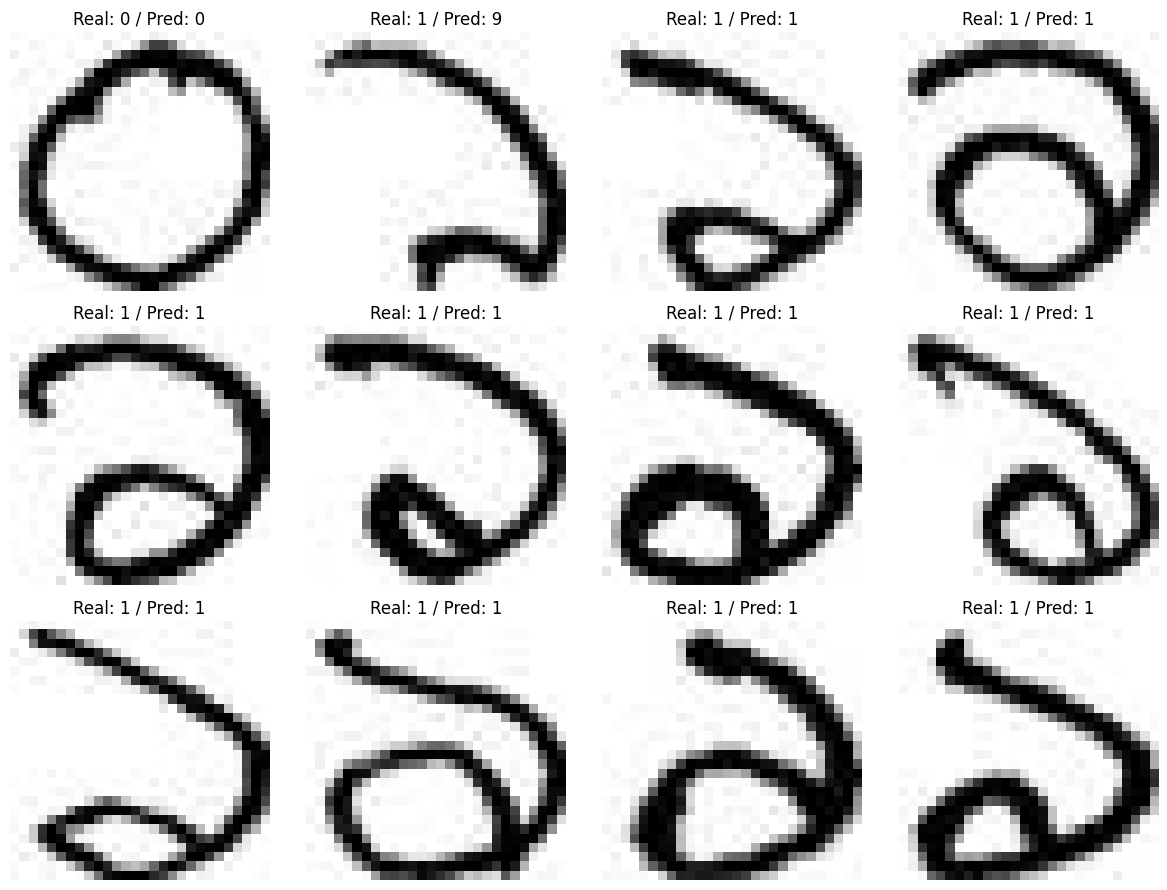

In [39]:
# Muestra 12 imágenes de predicciones del conjunto de prueba desde una posición específica
def visualizar_predicciones(model, test_images, test_labels, inicio=0):
    assert 0 <= inicio <= len(test_images) - 12, "El rango debe ser válido dentro del dataset."

    model.eval()
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.ravel()

    with torch.no_grad():
        for i in range(12):
            idx = inicio + i
            image = test_images[idx].to(device)
            label = test_labels[idx].item()
            output = model(image.view(1, 1, 28, 28))
            pred = torch.argmax(output, dim=1).item()

            axes[i].imshow(image.cpu().view(28, 28), cmap='gray')
            axes[i].set_title(f"Real: {label} / Pred: {pred}")
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualizar_predicciones(model, test_images, test_labels, inicio=312)



# 11. Visualización de los filtros de la primera capa oculta

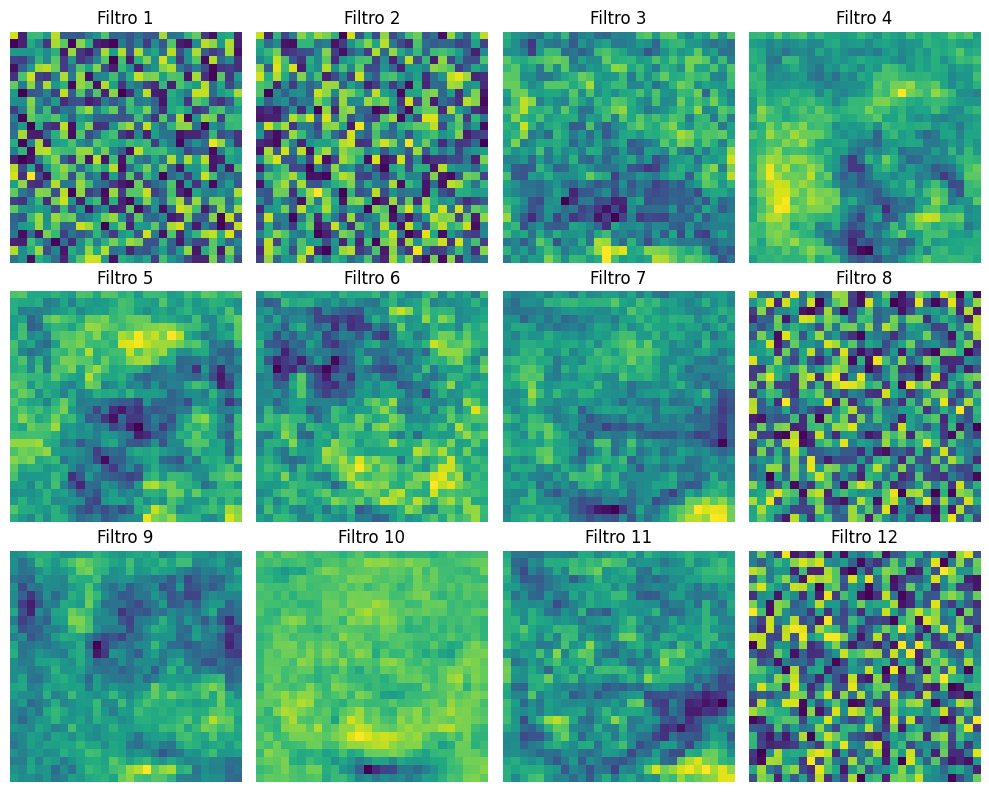

In [40]:
# Muestra los primeros 12 filtros (pesos) de la primera capa oculta de la red
def visualizar_pesos(model):
    pesos = model.fc1.weight.data.cpu().numpy()

    fig, axes = plt.subplots(3, 4, figsize=(10, 8))
    axes = axes.ravel()

    for i in range(12):
        axes[i].imshow(pesos[i].reshape(28, 28), cmap='viridis')
        axes[i].set_title(f"Filtro {i+1}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualizar_pesos(model)


### ¿Por qué no podemos visualizar los filtros de la capa 2 y 3?

La **primera capa oculta** (`fc1`) está directamente conectada a las **imágenes de entrada** (28x28 píxeles), por lo que sus **pesos** pueden representarse visualmente como **imágenes** de 28x28. Sin embargo, las **capas 2 y 3** (`fc2` y `fc3`) no están conectadas directamente a los píxeles, sino a las **activaciones** de las capas anteriores, que son representaciones abstractas y no tienen una forma de imagen visual.

Las **activaciones de las capas ocultas** 2 y 3 son vectores de números, no matrices de píxeles, por lo que no tiene sentido visualizarlas como imágenes. En lugar de eso, podemos analizar sus **activaciones** o **pesos** de manera diferente, pero no como las imágenes de la primera capa.


# 12. Visualizar capas ocultas mediante activaciones

In [42]:
# Calcula y devuelve las activaciones de las tres capas ocultas para una imagen dada
def get_activaciones_ocultas(modelo, imagen):
    imagen = imagen.view(1, -1).to(device)  # Aplanar y pasar a GPU
    with torch.no_grad():
        x1 = torch.relu(modelo.fc1(imagen))  # Activación de la capa 1
        x2 = torch.relu(modelo.fc2(x1))     # Activación de la capa 2
        x3 = torch.relu(modelo.fc3(x2))     # Activación de la capa 3
    return x1.cpu(), x2.cpu(), x3.cpu()

# Muestra las activaciones de una capa oculta específica en función de las neuronas
def graficar_activaciones(activacion, capa_num):
    activacion = activacion.squeeze().numpy()
    plt.figure(figsize=(14, 4))
    plt.plot(activacion, marker='o', linestyle='-', markersize=3)
    plt.title(f"Activaciones de la capa oculta {capa_num}")
    plt.xlabel("Neurona")
    plt.ylabel("Valor de activación")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 13. Activaciones de capas ocultas de una imagen especifica

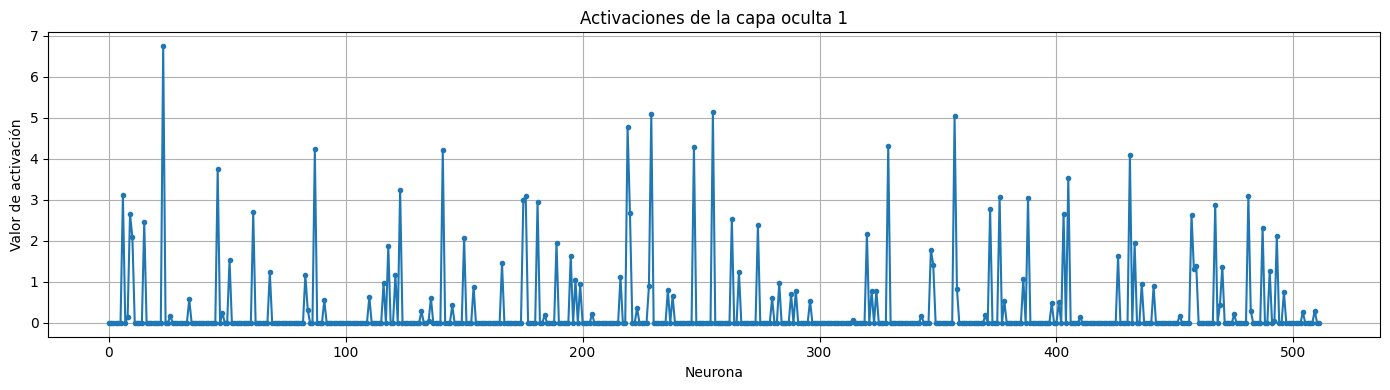

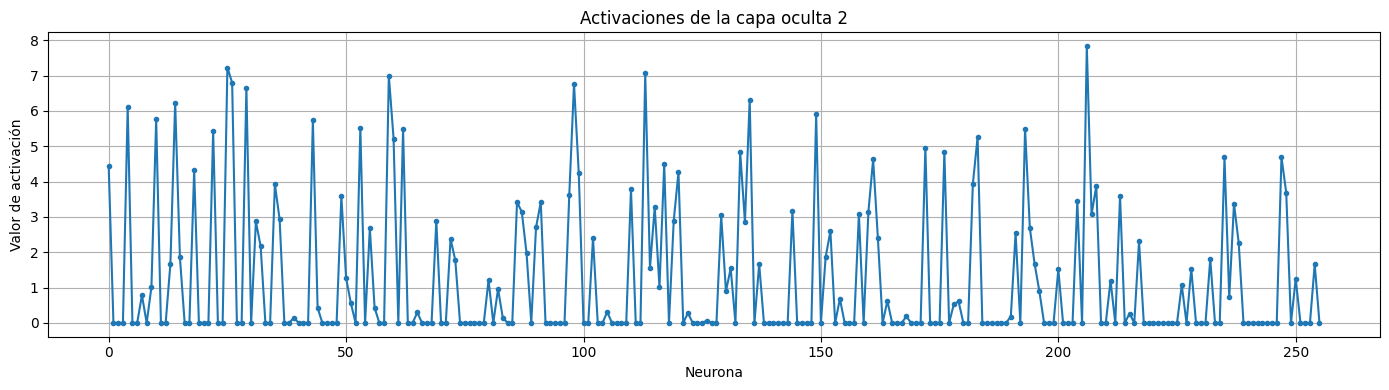

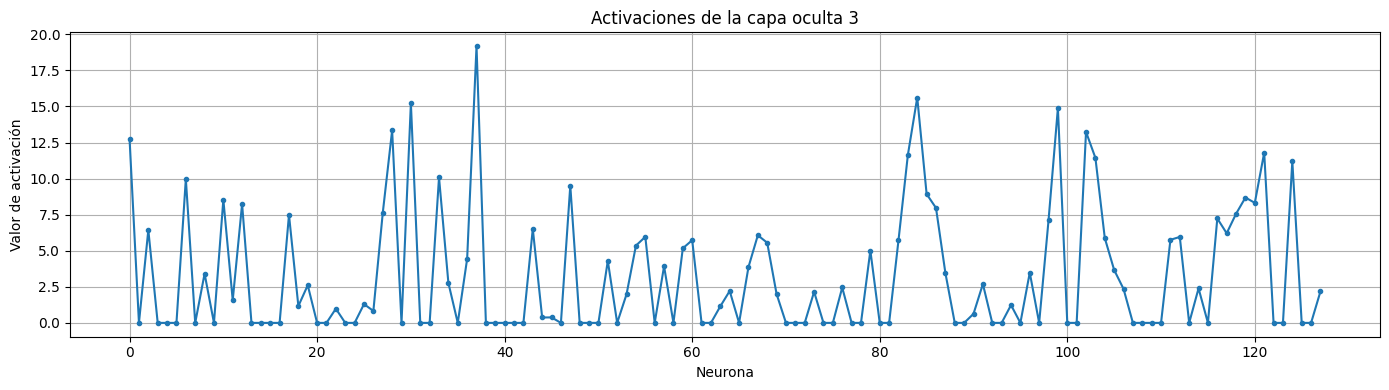

In [43]:
# Muestra las activaciones de las tres capas ocultas para la imagen seleccionada
img = test_images[102]  # Elegir imagen del conjunto de prueba (ejemplo: imagen 102)
x1, x2, x3 = get_activaciones_ocultas(model, img)  # Obtener activaciones de las tres capas

# Mostrar las activaciones de cada capa
graficar_activaciones(x1, capa_num=1)
graficar_activaciones(x2, capa_num=2)
graficar_activaciones(x3, capa_num=3)
